<a href="https://colab.research.google.com/github/among5094/AI_lecture/blob/main/10%2C11%EA%B0%95_%EB%9E%9C%EB%8D%A4%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EA%B0%95%EC%9D%9810%EA%B0%95_%EB%9E%9C%EB%8D%A4%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8(%EC%95%99%EC%83%81%EB%B8%94).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 인공지능강의 10강: 랜덤포레스트

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
#붓꽃데이터 불러오기
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names) #총 3가지 붓꽃(Setosa, Versicolour, Virginica )
df['flower']= iris.target

In [3]:
#데이터확인
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
#input, output 데이터 넣기
input = iris.data
output = df['flower']

In [6]:
#Train Set, Test Set분리
from sklearn.model_selection import train_test_split
train_input, test_input, train_output, test_output = train_test_split(
    input,output)

In [8]:
#랜덤포레스트(앙상블)
#기법이 2,3개가 섞이면 앙상블이라고 한다.

from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()

In [9]:
#훈련
RF.fit(train_input, train_output)

RandomForestClassifier()

In [11]:
#성능평가
RF.score(test_input, test_output)

0.9736842105263158

In [13]:
#특성 중요도(의사결정트리,랜덤포레스트)
RF.feature_importances_

array([0.11198337, 0.03812771, 0.39988758, 0.45000134])

AttributeError: ignored

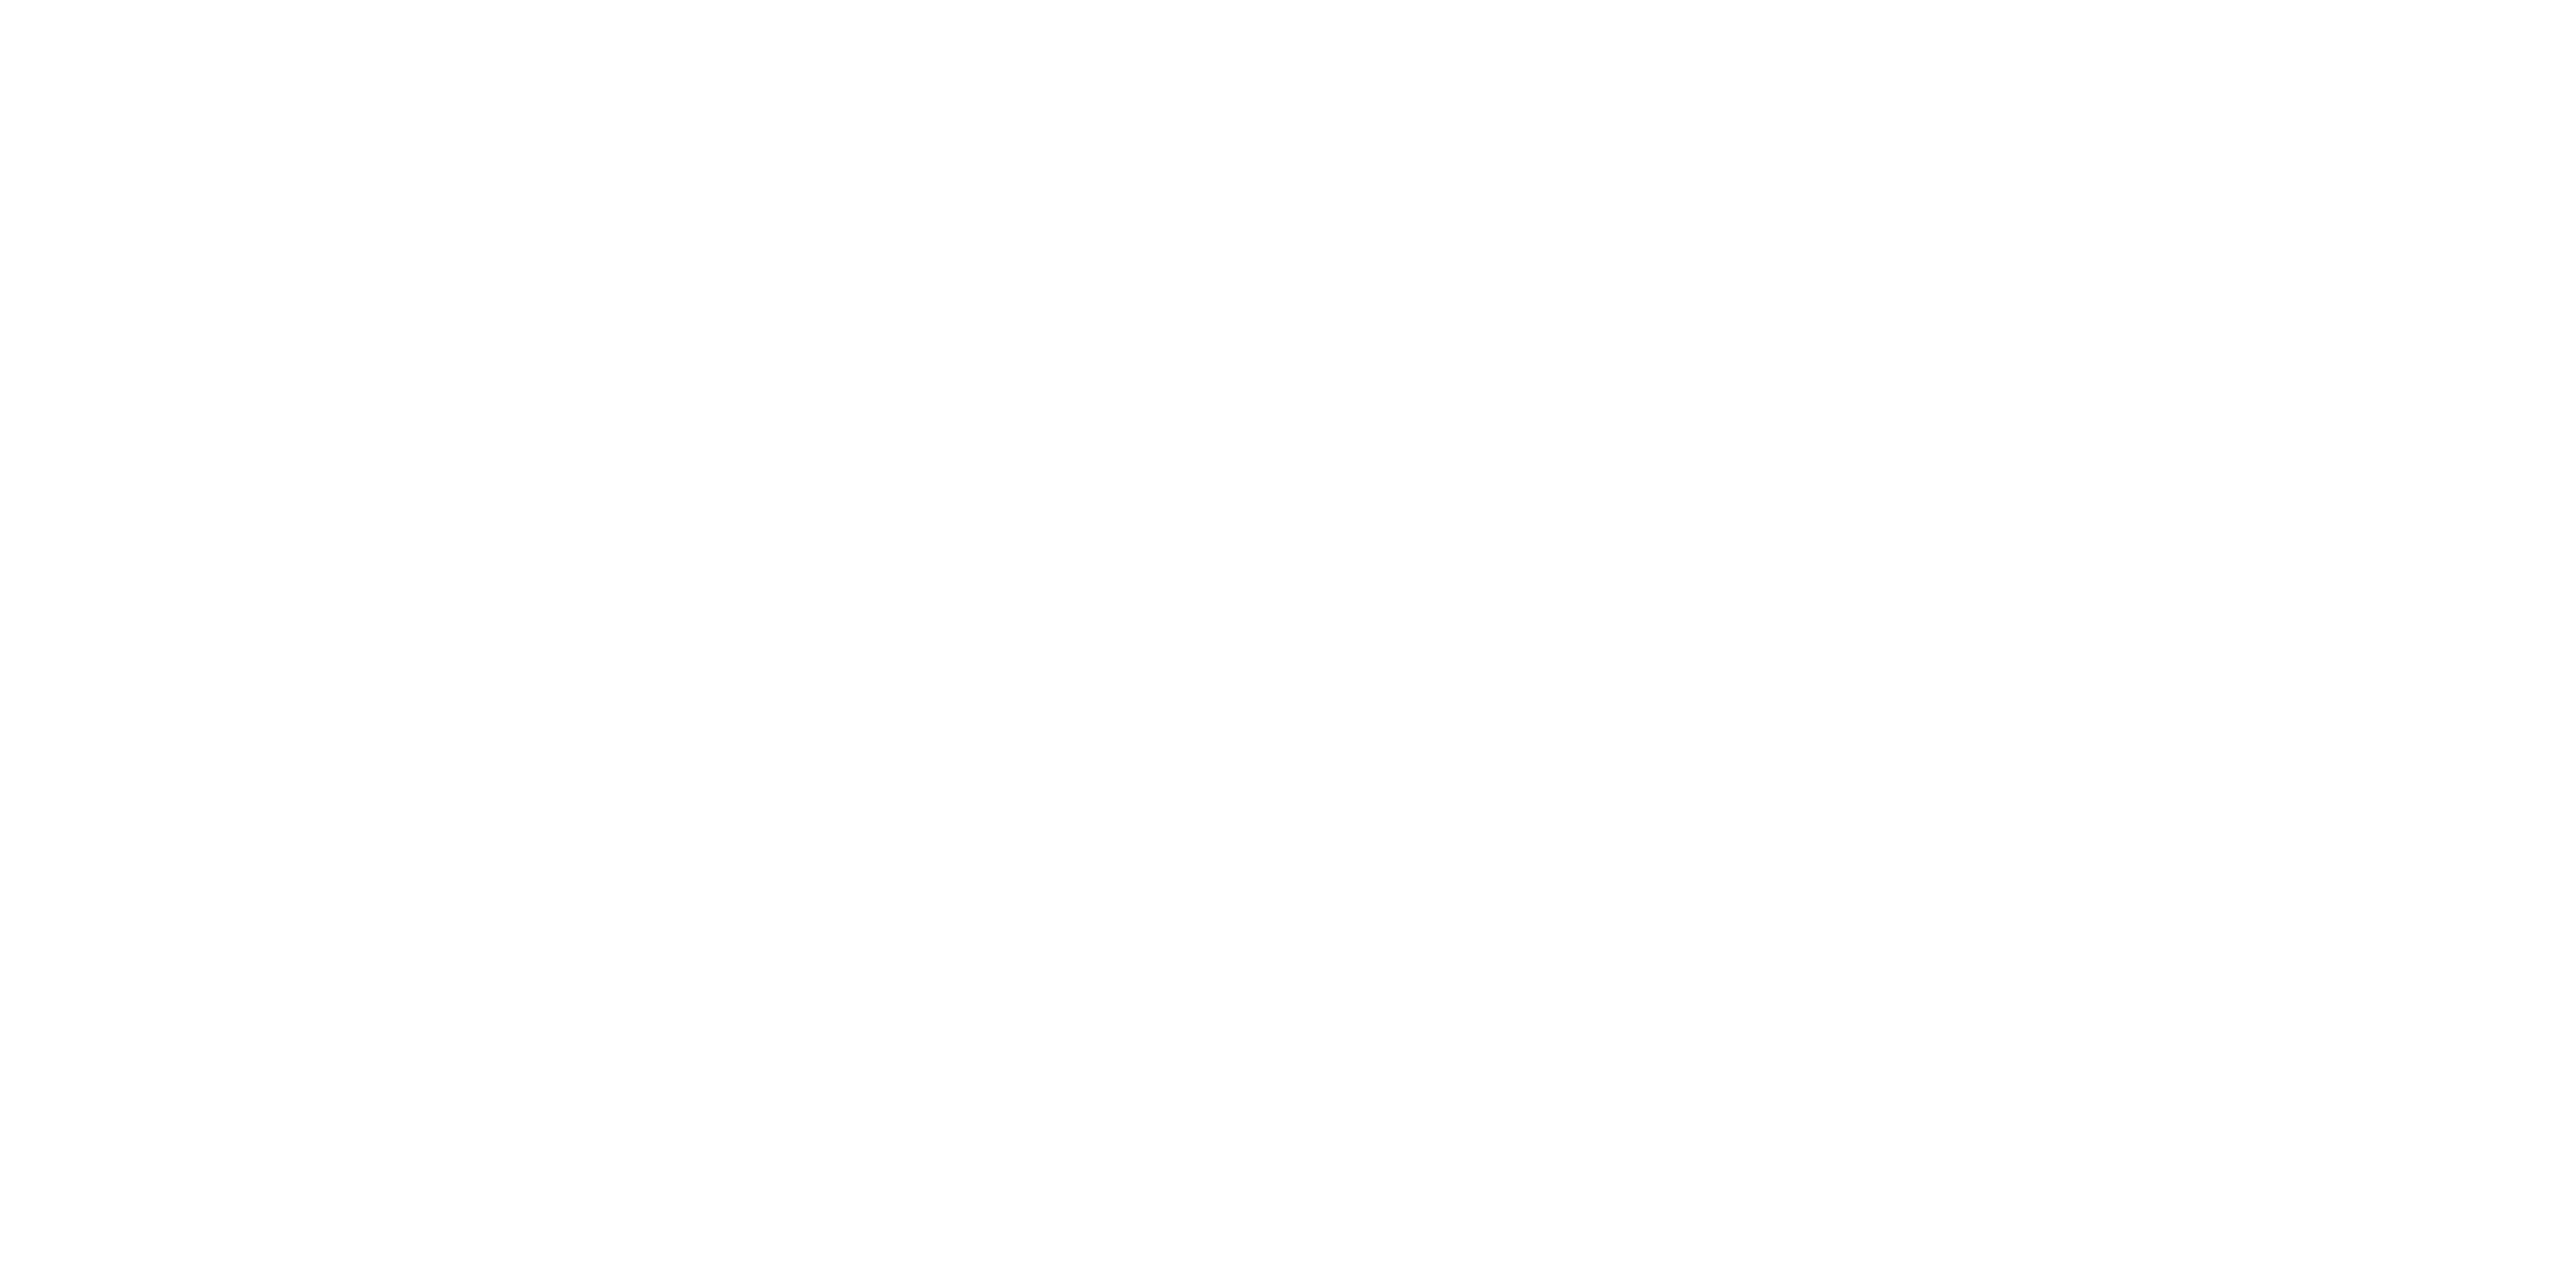

In [15]:
#트리시각화 -> 오류 -> 하나를 선정해줘야함
from sklearn.tree import plot_tree

plt.figure( figsize=(60,30))
plot_tree(RF, max_depth=3, filled=True, feature_names=iris.feature_names)

In [18]:
#시각화 하려면 랜덤한 것들 중에 1개 선택
from sklearn.tree import export_graphviz
RF_sample = RF.estimators_[0]

[Text(0.4583333333333333, 0.9285714285714286, 'petal width (cm) <= 0.8\ngini = 0.655\nsamples = 73\nvalue = [47, 34, 31]'),
 Text(0.375, 0.7857142857142857, 'gini = 0.0\nsamples = 28\nvalue = [47, 0, 0]'),
 Text(0.5416666666666666, 0.7857142857142857, 'sepal length (cm) <= 6.25\ngini = 0.499\nsamples = 45\nvalue = [0, 34, 31]'),
 Text(0.3333333333333333, 0.6428571428571429, 'petal width (cm) <= 1.65\ngini = 0.332\nsamples = 23\nvalue = [0, 30, 8]'),
 Text(0.16666666666666666, 0.5, 'petal length (cm) <= 4.8\ngini = 0.064\nsamples = 18\nvalue = [0, 29, 1]'),
 Text(0.08333333333333333, 0.35714285714285715, 'gini = 0.0\nsamples = 16\nvalue = [0, 27, 0]'),
 Text(0.25, 0.35714285714285715, 'sepal width (cm) <= 2.45\ngini = 0.444\nsamples = 2\nvalue = [0, 2, 1]'),
 Text(0.16666666666666666, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 2, 0]'),
 Text(0.5, 0.5, 'petal width (cm) <= 1.75\n

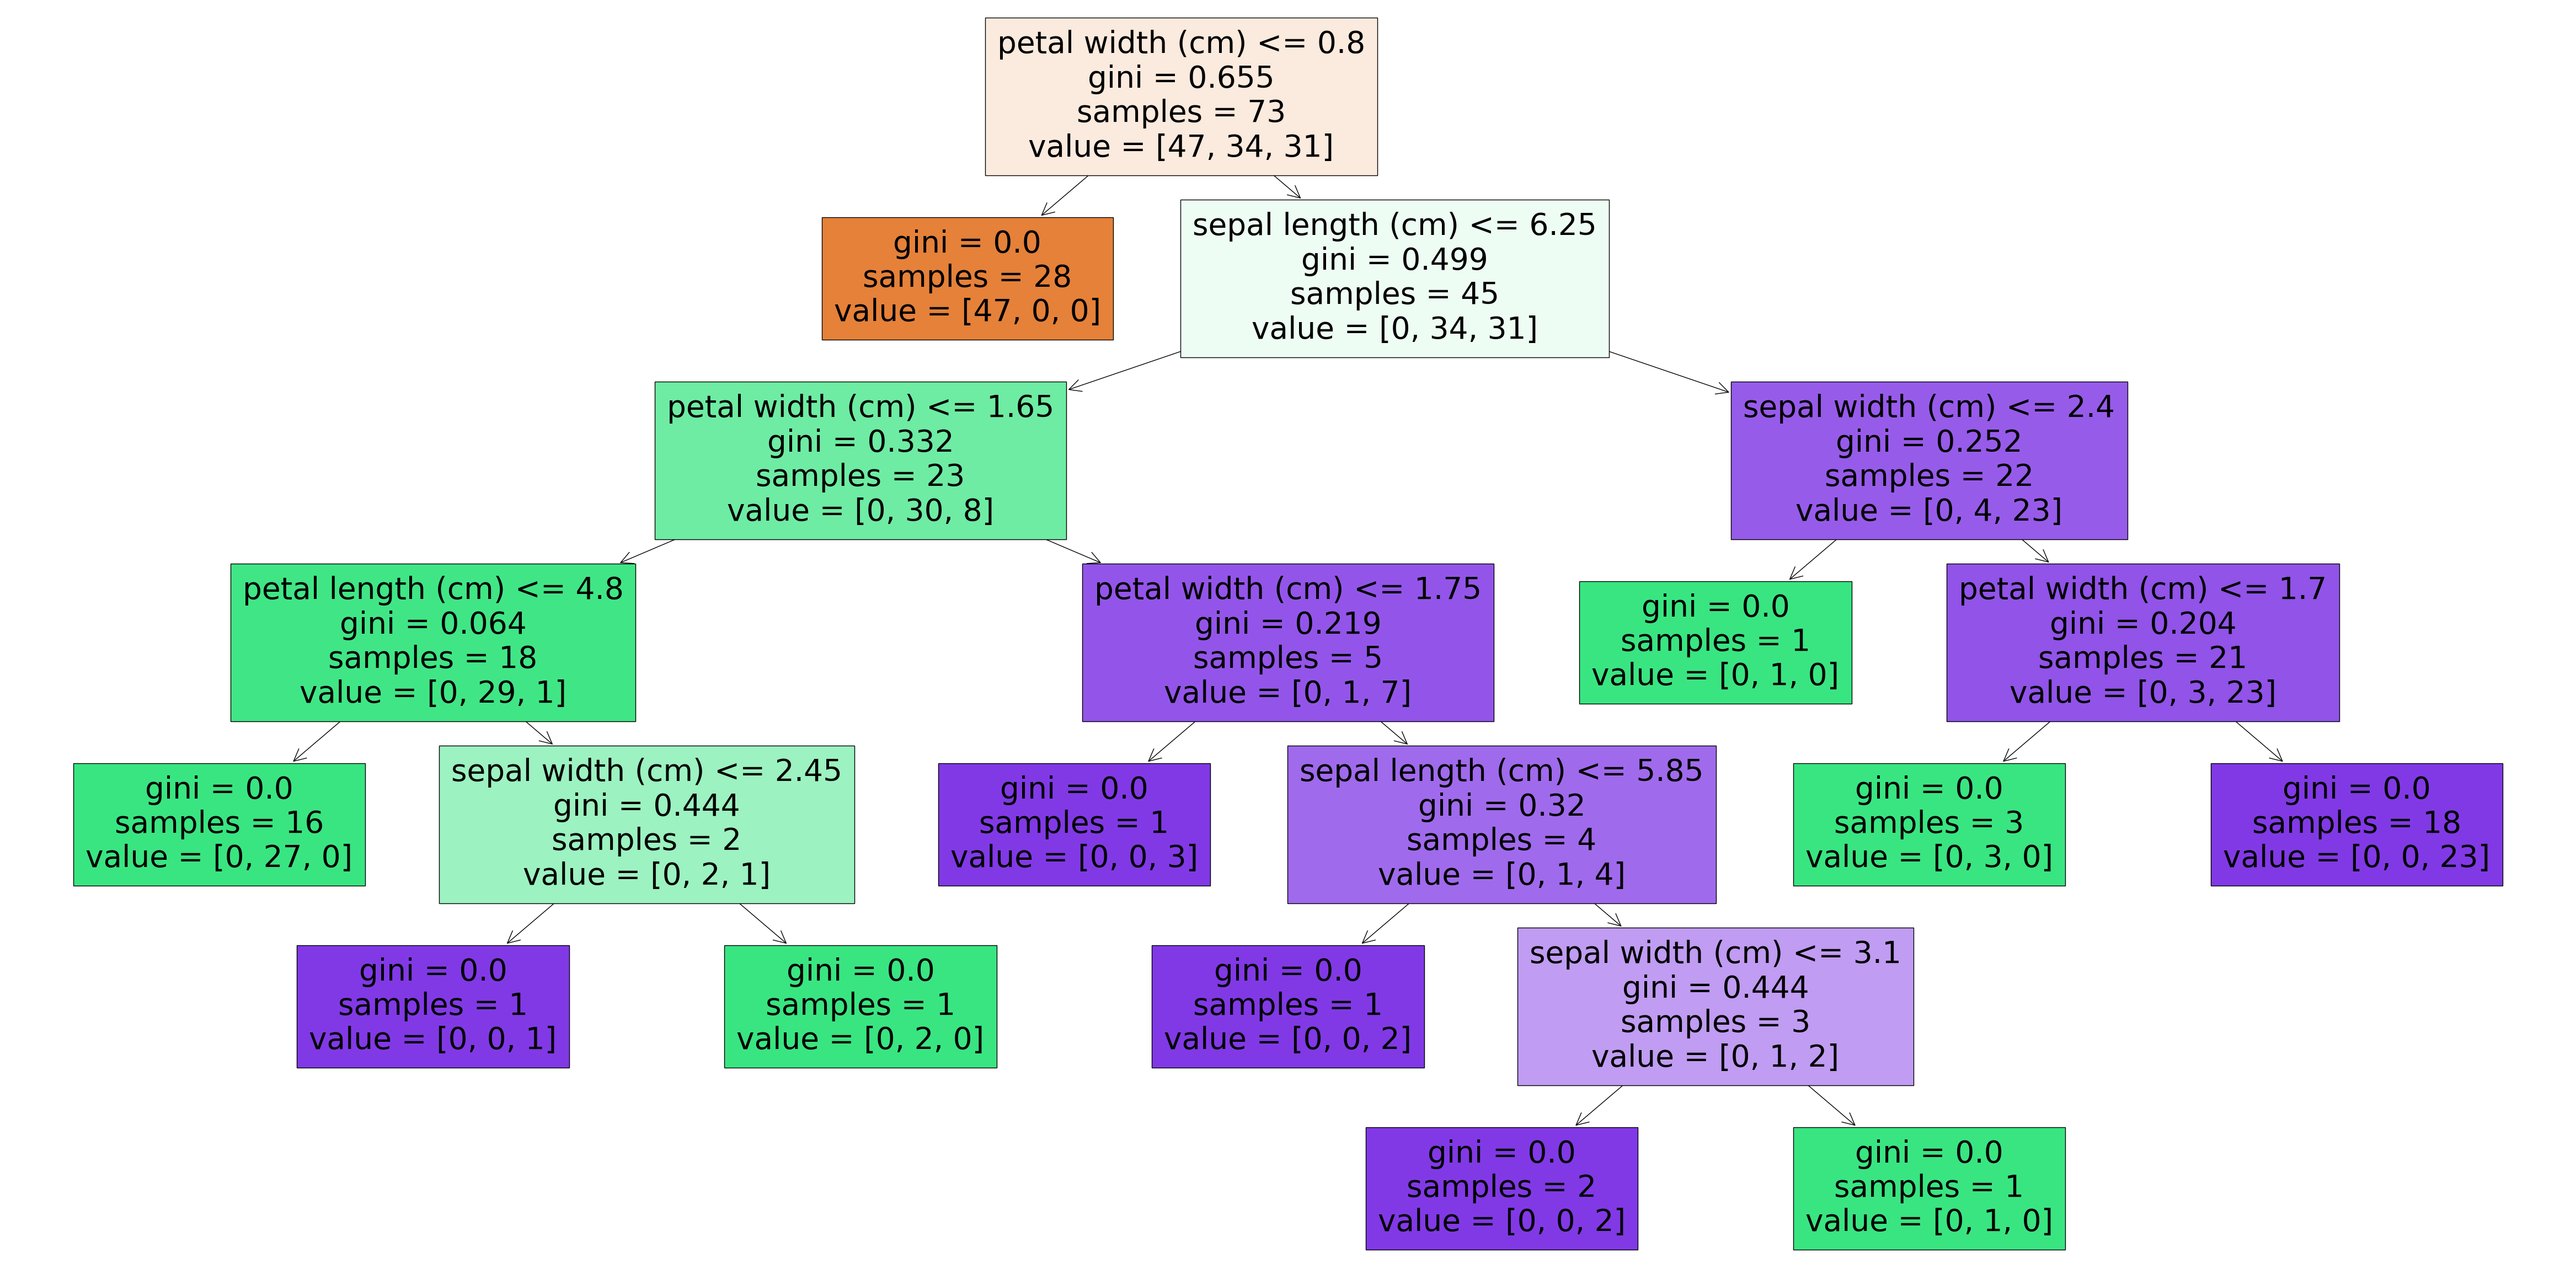

In [20]:
#대표적으로 하나 그리기
plt.figure( figsize=(60,30))
plot_tree(RF_sample, filled=True, feature_names=iris.feature_names)

In [21]:
#회귀기법 -> 보스턴 집값 예측문제 (그러나 데이터의 윤리적인 문제로 데이터를 못씀)
from sklearn.ensemble import RandomForestClassifier